In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# conn = engine.connect()

In [9]:
# reflect an existing database into a new model - 10-Ins_Flask_with_ORM
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [10]:
# View all of the classes that automap found - 11-Stu_Chinook_Database_Analysis
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()


['measurement', 'station']

In [11]:
# Save references to each table -- 10-Ins_Flask_with_ORM
Measurement = Base.classes.measurement
Station = Base.classes.station



In [12]:
# Create our session (link) from Python to the DB - 10-Ins_Flask_with_ORM
session = Session(engine)


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set. - 03-Stu_Dates
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

The most recent date:  ('2017-08-23',)
Query Date one year from the last date:  2016-08-23


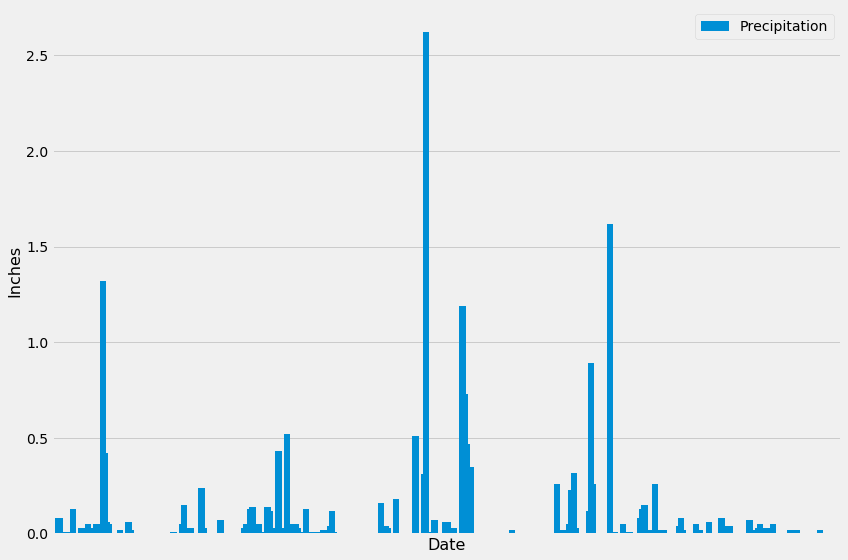

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. - 03-Stu_Dates and 02-Ins_Dates
# Starting from the most recent data point in the database. 
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("The most recent date: ", recent)
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date one year from the last date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, (Measurement.prcp)).\
                    filter(Measurement.date >= query_date).\
                    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_results = pd.DataFrame(results, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
date_df = df_results.sort_values('Date')


# Use Pandas Plotting with Matplotlib to plot the data
ax = date_df.plot(kind='bar', width=3, figsize=(12,8))
ax.set_xticks([])
ax.grid(True)
date_df.set_index('Date', inplace=True)
plt.ylabel("Inches", size=16)
plt.xlabel("Date", size=16)
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_results = session.query(Measurement.prcp)
                    
df = pd.DataFrame(df_results, columns=['Precipitation'])
df_stats = df.describe()
df_stats

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?) - 02-Ins_Dates
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature. - 04-Par_CRUD_DB
# grab the first row/column representing the most active station from the list/tuple 'active_stations'
most_active = active_stations[0][0]
lha_temp = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == most_active).all()
print(lha_temp)

[(54.0, 71.66378066378067, 85.0)]


In [25]:
# active_12

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

<function matplotlib.pyplot.show(*args, **kw)>

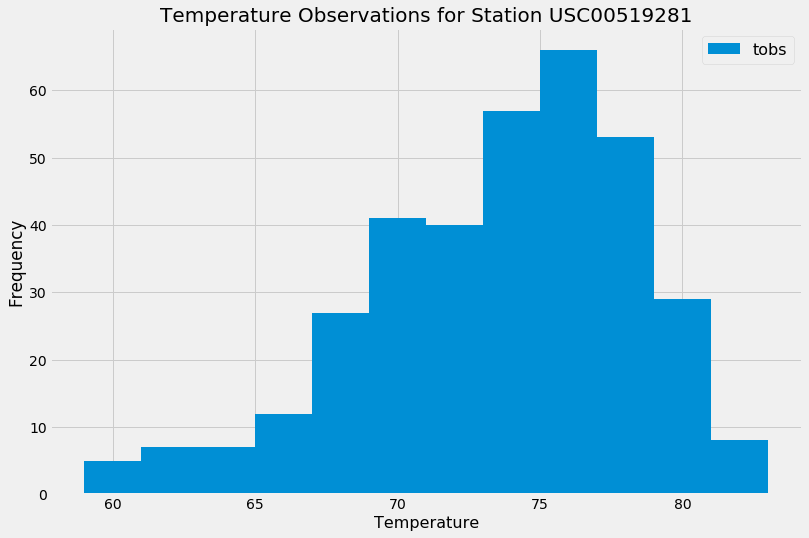

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Design a query to get the previous 12 months of temperature observation (TOBS) data. To do so, complete the following steps:
# Filter by the station that has the greatest number of observations.
# Query the previous 12 months of TOBS data for that station.
# Plot the results as a histogram with bins=12, as the following image shows:

active_12 = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == most_active).\
                filter(Measurement.date >= query_date).all()
hist_df = pd.DataFrame(active_12)

hist_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid(visible=True, which='major', axis='both')
plt.title("Temperature Observations for Station " + most_active, fontsize=20)
plt.xlabel("Temperature", fontsize=16)
plt.legend(['tobs'], bbox_to_anchor=(1,1), fontsize=16)

plt.show


[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

# Close Session

In [24]:
# Close Session
session.close()

datetime.date(2016, 8, 23)